In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
insurance = pd.read_csv('insurance.csv')

In [4]:
insurance.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523


In [5]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
insurance.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
# no null value in the data set

In [10]:
insurance['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [12]:
insurance['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

In [13]:
insurance['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [14]:
df = insurance

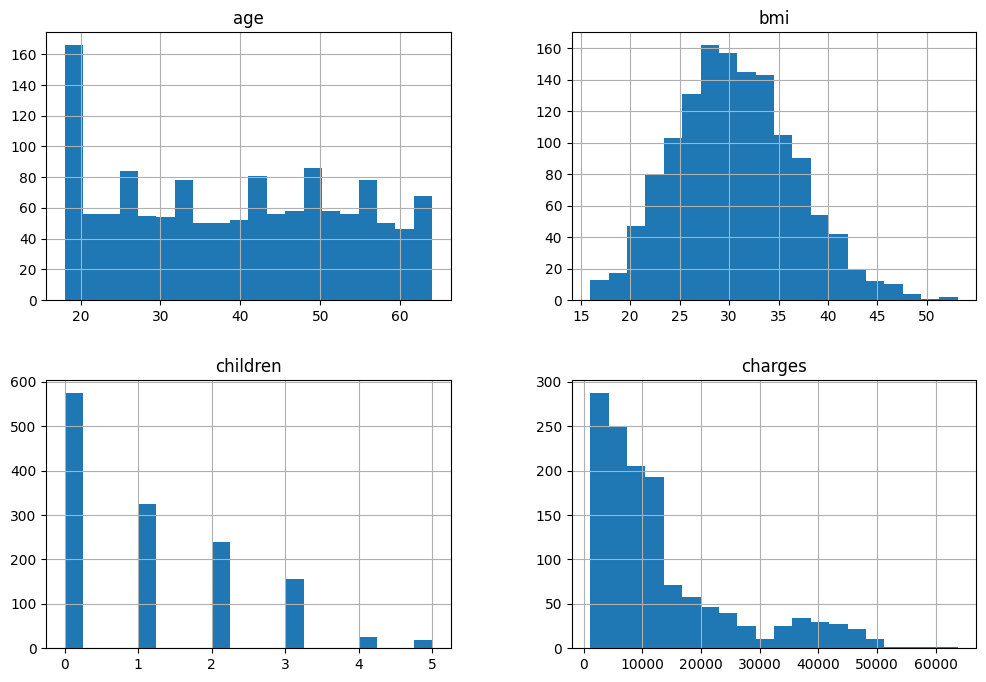

In [15]:
df.hist(bins=20, figsize=(12,8))
plt.show()

In [16]:
# 'bmi' seems follows almost a normal distribution so that's fine
# 'children' is categorical 
# 'age' shows not completely symmetric and scaling will be applied
# charges is our target so no need scaling

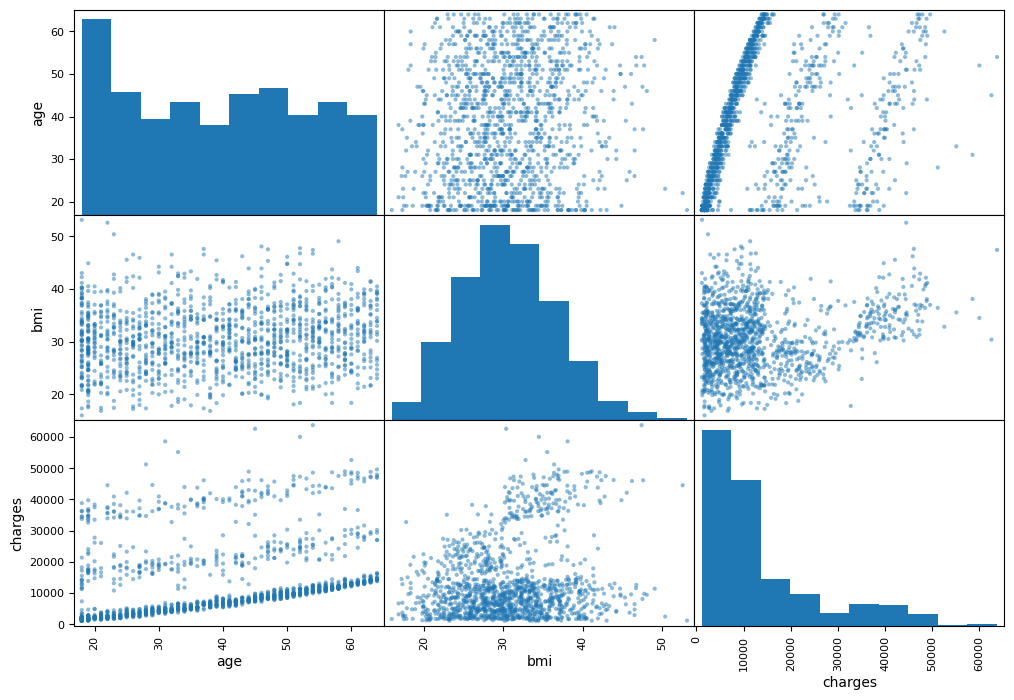

In [17]:
from pandas.plotting import scatter_matrix

attributes = ["age", "bmi", "charges"]
scatter_matrix(df[attributes], figsize=(12, 8))
plt.show()

In [18]:
# 'bmi' , 'charges' and 'age' are numerical and continues so considered for scatter to check possible correlations

<Axes: >

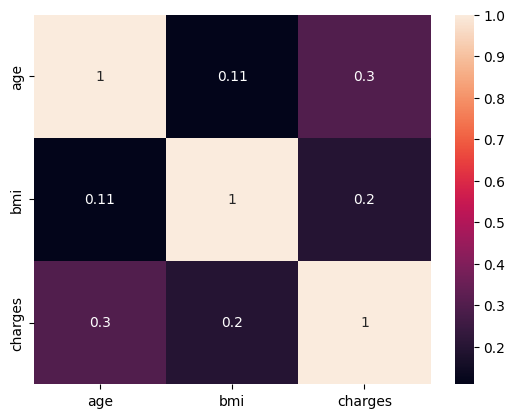

In [23]:
corr_matrix = df[attributes].corr(numeric_only=True)

sns.heatmap(corr_matrix, annot=True)

In [24]:
# the corr matrix represents quit week correlation between 3 numerical columns

### split data to train and test

In [25]:
X = df.drop('charges', axis=1)
y = df['charges'].copy()

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.2)

In [27]:
X_train.shape

(1070, 6)

In [28]:
X_test.shape

(268, 6)

### processing and transformation

In [29]:
# 'bmi' & 'age' are our candidates for scaling

In [30]:
# 'sex' , 'smoker' & 'region' are our candidates for encoding

In [34]:
# # encoding all columns at once
# from sklearn.preprocessing import OneHotEncoder

# # cat_encoder = OneHotEncoder(sparse_output=False)
# cat_encoder = OneHotEncoder()
# cat_encoder.fit(X_train[["sex", 'smoker', 'region']].values.reshape(-1, 1))

OneHotEncoder()

In [50]:
# cat_encoder.categories_

[array(['female', 'male', 'no', 'northeast', 'northwest', 'southeast',
        'southwest', 'yes'], dtype=object)]

In [37]:
# cat_train_encoded = cat_encoder.transform(X_train[['sex', 'smoker', 'region']].values.reshape(-1,1))

In [48]:
encoded_data.head(2)

,0
0,"(0, 1)\t1.0"
1,"(0, 2)\t1.0"


In [ ]:
# onhotencode for 3 columns at once didn't work. at least I couldn't

In [51]:
from sklearn.preprocessing import OneHotEncoder

In [52]:
# 'sex' encoding

# cat_encoder = OneHotEncoder(sparse_output=False)
sex_encoder = OneHotEncoder()
sex_encoder.fit(df["sex"].values.reshape(-1, 1))

OneHotEncoder()

In [63]:
sex_train_encoded = sex_encoder.transform(X_train["sex"].values.reshape(-1, 1))

In [62]:
sex_test_encoded = sex_encoder.transform(X_test["sex"].values.reshape(-1, 1))

In [55]:
# 'smoker' encoding

# cat_encoder = OneHotEncoder(sparse_output=False)
smoker_encoder = OneHotEncoder()
smoker_encoder.fit(df["smoker"].values.reshape(-1, 1))

OneHotEncoder()

In [61]:
smoker_train_encoded = smoker_encoder.transform(X_train["smoker"].values.reshape(-1, 1))

In [60]:
smoker_test_encoded = smoker_encoder.transform(X_test["smoker"].values.reshape(-1, 1))


In [98]:
# 'region' encoding

# cat_encoder = OneHotEncoder(sparse_output=False)
region_encoder = OneHotEncoder()
region_encoder.fit(df["region"].values.reshape(-1, 1))

OneHotEncoder()

In [99]:
region_train_encoded = region_encoder.transform(X_train["region"].values.reshape(-1, 1))

In [100]:
region_test_encoded = region_encoder.transform(X_test["region"].values.reshape(-1, 1))

In [81]:
# changing onehoteencoder objects into dataframe

In [126]:
region_train_df = pd.DataFrame(region_train_encoded)
region_train_df.head(3)

,0
0,"(0, 3)\t1.0"
1,"(0, 3)\t1.0"
2,"(0, 2)\t1.0"


In [127]:
#  as shown the onehotencode outout in single column is not meaningfull
# so similar to get_dummies the output needs to be multiple columns
# no need to values & reshape

####  to make a better code the encoding rewritten again bellow 

In [133]:

# Create a OneHotEncoder instance
encoder = OneHotEncoder(sparse=False)

# Specify the columns to be one-hot encoded
columns_to_encode = ['sex', 'smoker', 'region']  # Replace with your column names

# Fit the selected columns
encoded_data = encoder.fit(df[columns_to_encode])

# Transform the X_train and X_test 
X_train_encoded = encoded_data.transform(X_train[columns_to_encode])
X_test_encoded = encoded_data.transform(X_test[columns_to_encode])

# Access the feature names of the one-hot encoded columns
feature_names = encoder.get_feature_names_out(input_features=columns_to_encode)

# Create a DataFrame with the one-hot encoded data
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=feature_names)
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=feature_names)
                               

/home/adel/ml/assignments/myenv/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [135]:
X_train_encoded_df.head(2)

,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [136]:
X_test_encoded_df.head(2)

,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0


### scaling

In [137]:
df_train_num = X_train.select_dtypes(include=[np.number])
df_test_num = X_test.select_dtypes(include=[np.number])

In [138]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
std_scaler.fit(df_train_num)

StandardScaler()

In [147]:
# scaled numerical data frame
X_train_scaled = std_scaler.transform(df_train_num)
X_test_scaled = std_scaler.transform(df_test_num)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=df_train_num.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=df_train_num.columns)

In [148]:
X_train_scaled.columns

Index(['age', 'bmi', 'children'], dtype='object')

In [152]:
# Concatenate the one-hot encoded DataFrame with the original DataFrame
X_train = pd.concat([X_train_scaled, X_train_encoded_df], axis=1)
X_test = pd.concat([X_test_scaled, X_test_encoded_df], axis=1)

In [159]:
X_train.columns

Index(['age', 'bmi', 'children', 'sex_female', 'sex_male', 'smoker_no',
       'smoker_yes', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')

### train

In [160]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [161]:
lr_model.coef_

array([  3550.46434261,   2105.71762293,    535.01701967,    -47.22432343,
           47.22432343, -12087.51963316,  12087.51963316,    433.19297251,
          178.25299209,   -415.9214295 ,   -195.5245351 ])

### evaluation

In [156]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error

In [163]:
y_predict = lr_model.predict(X_test)

In [164]:
r2_score(y_test, y_predict)

0.7414169976674785

In [165]:
mean_squared_error(y_test, y_predict, squared=False)

6157.068237353749

In [166]:
mean_absolute_error(y_test, y_predict)

4270.618269460856

In [167]:
mean_absolute_percentage_error(y_test, y_predict)

0.4448918094510926

In [ ]:
# r2 about 74% 
# mean_abs_err about 44% (not good)

In [ ]:

# Concatenate the one-hot encoded DataFrame with the original DataFrame
# full_X_train = pd.concat([X_train, X_train_encoded_df], axis=1)
# full_X_test = pd.concat([X_test, X_test_encoded_df], axis=1)

# Drop the original columns 

# X_train_final = full_X_train.drop(columns=columns_to_encode)
# X_test_final = full_X_test.drop(columns=columns_to_encode)